In [1]:
from pylab import *
import matplotlib.pyplot as plt
import random
import numpy as np
from queryParser import *
import psycopg2
from moz_sql_parser import parse
from moz_sql_parser import format

FACT="lineorder"
def Iterative_Improuvement(nsp,cursor):
    
    starting_points=[]
    locals_min=[]
    joinedTables ,parsed_query,alias=queryParser(input)
    joinedTables.remove(FACT)
    starting_points=get_starting_points(nsp,joinedTables)
    #Browse the starting points
    for i in range(0,len(starting_points)):
        point=starting_points[i]
        query=listToQuery(point,get_indice(point),parsed_query)
        point_cost=get_cost(query,cursor)
        print('starting point',i,point,'with cost', point_cost)
        
         #initialize local_min and global_min
        local_min=point_cost
        global_min=point_cost
        
      
        neighbors=get_neighbors(point)
        for neighbor in neighbors :
            neighborQuery=listToQuery(neighbor,get_indice(neighbor),parsed_query)
            neighbor_cost=get_cost(neighborQuery,cursor)
            print('neighbor' , neighbor, 'with cost', neighbor_cost)
    
            if neighbor_cost<=local_min:
                local_min=neighbor_cost
                min_state=neighborQuery
                print('min state',min_state)
                
        locals_min.append((min_state,local_min))
        print("\n")
                
    #browse the locals_min to get global_min and the solution     
    for s,c in locals_min:
        if(c<=global_min):
            global_min=c
            min_state=(s,c)
            
    
    return min_state




In [4]:
#Execution
import time 





input=" SELECT d.d_year,s.s_city,p.p_brand1,SUM(l.lo_revenue - l.lo_supplycost) AS profit FROM date d,customer c,supplier s,part p,lineorder l WHERE l.lo_custkey = c.c_custkey AND l.lo_suppkey = s.s_suppkey  AND l.lo_partkey = p.p_partkey AND l.lo_orderdate = d.d_datekey AND c.c_region = 'AMERICA' AND s.s_nation = 'UNITED STATES' AND (d.d_year = 1997 OR d.d_year = 1998)  AND p.p_category = 'MFGR#14' GROUP BY  d.d_year, s.s_city, p.p_brand1 ORDER BY d.d_year,s.s_city,p.p_brand1 "

    
conn,cursor = connect_bdd("ssb")    

#apply the algorithm
min_state=Iterative_Improuvement(2,cursor)
print("solution" ,min_state)
print('Postgres Cost: ',get_cost(input,cursor))
disconnect_bdd(conn)  



jjjjjjjjjjjj {'select': [{'value': 'd.d_year'}, {'value': 's.s_city'}, {'value': 'p.p_brand1'}, {'value': {'sum': {'sub': ['l.lo_revenue', 'l.lo_supplycost']}}, 'name': 'profit'}], 'from': [{'value': 'lineorder', 'name': 'l'}, {'join': {'name': 'p', 'value': 'part'}, 'on': {'eq': ['l.lo_partkey', 'p.p_partkey']}}, {'join': {'name': 'c', 'value': 'customer'}, 'on': {'eq': ['l.lo_custkey', 'c.c_custkey']}}, {'join': {'name': 's', 'value': 'supplier'}, 'on': {'eq': ['l.lo_suppkey', 's.s_suppkey']}}, {'join': {'name': 'd', 'value': 'date'}, 'on': {'eq': ['l.lo_orderdate', 'd.d_datekey']}}], 'where': {'and': [{'eq': ['c.c_region', {'literal': 'AMERICA'}]}, {'eq': ['s.s_nation', {'literal': 'UNITED STATES'}]}, {'or': [{'eq': ['d.d_year', 1997]}, {'eq': ['d.d_year', 1998]}]}, {'eq': ['p.p_category', {'literal': 'MFGR#14'}]}]}, 'groupby': [{'value': 'd.d_year'}, {'value': 's.s_city'}, {'value': 'p.p_brand1'}], 'orderby': [{'value': 'd.d_year'}, {'value': 's.s_city'}, {'value': 'p.p_brand1'}]}


{'select': [{'value': 'd.d_year'}, {'value': 's.s_city'}, {'value': 'p.p_brand1'}, {'value': {'sum': {'sub': ['l.lo_revenue', 'l.lo_supplycost']}}, 'name': 'profit'}], 'from': [{'value': 'date', 'name': 'd'}, {'value': 'customer', 'name': 'c'}, {'value': 'supplier', 'name': 's'}, {'value': 'part', 'name': 'p'}, {'value': 'lineorder', 'name': 'l'}], 'where': {'and': [{'eq': ['l.lo_custkey', 'c.c_custkey']}, {'eq': ['l.lo_suppkey', 's.s_suppkey']}, {'eq': ['l.lo_partkey', 'p.p_partkey']}, {'eq': ['l.lo_orderdate', 'd.d_datekey']}, {'eq': ['c.c_region', {'literal': 'AMERICA'}]}, {'eq': ['s.s_nation', {'literal': 'UNITED STATES'}]}, {'or': [{'eq': ['d.d_year', 1997]}, {'eq': ['d.d_year', 1998]}]}, {'eq': ['p.p_category', {'literal': 'MFGR#14'}]}]}, 'groupby': [{'value': 'd.d_year'}, {'value': 's.s_city'}, {'value': 'p.p_brand1'}], 'orderby': [{'value': 'd.d_year'}, {'value': 's.s_city'}, {'value': 'p.p_brand1'}]}
taaaable aveeeec aliaaas
saaaaans joiiiiin
starting point 0 ['supplier', 'lin

neighbor ('customer', 'lineorder', 'date', 'part', 'supplier') with cost 3592629.29


starting point 3 ['lineorder', 'customer', 'supplier', 'date', 'part'] with cost 3546530.28
neighbor ('lineorder', 'supplier', 'customer', 'date', 'part') with cost 3462894.4
min state ('lineorder', 'supplier', 'customer', 'date', 'part')
neighbor ('customer', 'lineorder', 'supplier', 'date', 'part') with cost 3546530.28
neighbor ('lineorder', 'customer', 'supplier', 'part', 'date') with cost 3544643.24
neighbor ('lineorder', 'customer', 'part', 'date', 'supplier') with cost 3543618.54
neighbor ('lineorder', 'part', 'supplier', 'date', 'customer') with cost 3442532.71
min state ('lineorder', 'part', 'supplier', 'date', 'customer')
neighbor ('lineorder', 'date', 'supplier', 'customer', 'part') with cost 3699906.69
neighbor ('lineorder', 'customer', 'date', 'supplier', 'part') with cost 3593407.06


min state (('lineorder', 'part', 'supplier', 'date', 'customer'), 3442532.71)
Solution: SELECT d.d_year, 

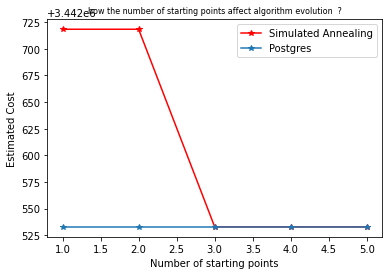

In [2]:
t=1
sa=[]
po=[]
#print("fddqa")
conn,cursor = connect_bdd("ssb")
input="SELECT d.d_year,s.s_city,p.p_brand1,SUM(l.lo_revenue - l.lo_supplycost) AS profit  FROM date d,customer c,supplier s,part p,lineorder l WHERE l.lo_custkey = c.c_custkey AND l.lo_suppkey = s.s_suppkey  AND l.lo_partkey = p.p_partkey AND l.lo_orderdate = d.d_datekey AND c.c_region = 'AMERICA' AND s.s_nation = 'UNITED STATES' AND (d.d_year = 1997 OR d.d_year = 1998)  AND p.p_category = 'MFGR#14' GROUP BY  d.d_year, s.s_city, p.p_brand1 ORDER BY d.d_year,s.s_city,p.p_brand1;"
starting_points=[]


R,mode,parsed_query=queryParser(input)
R=delete_fact(R)


for i in range(1,6):
    starting_points=get_starting_points(t,R)
    #print("hiii")
    #apply the algorithm
    min_state,min_locals,costs=Iterative_Improuvement(starting_points,mode,parsed_query,cursor)
    print("min state" ,min_state)
    solution=listToQuery(list(min_state)[0],get_indice(list(min_state)[0]),mode,parsed_query)
    print('Solution:',solution, 'with cost ', min_state[1])
    sa.append(min_state[1])
    cost=postgres_cost(input,cursor)
    print('Postgres Cost: ',cost)
    po.append(cost)
    t+=1
    
    
x = array([1,2,3,4,5])
y1 = array(sa)
y2=array(po)
plot(x, y1,'r-',label="Simulated Annealing",marker="*")
plot(x,y2,label="Postgres",marker="*")
legend()

plt.title('how the number of starting points affect algorithm evolution  ?', fontsize=8)
plt.xlabel("Number of starting points")
plt.ylabel("Estimated Cost")
plt.savefig('II.png')
show()
        
disconnect_bdd(conn)  
    